# Hello, my name is Mark Lyumanov and this is my project!
I am from group 231-2 and my project based on dataset named "Big Mac Index". During my project i have analysed, transformed and made some graphics based on the information below.
All information in this databse was taken from 2000 to 2022. It consist such information as:
1. **date**: Date of observation

2. **iso_a3**: Country code

3. **currency_code**: Currency code

4. **name**: Country name

5. **local_price**: Price of a Big Mac in the local currency

6. **dollar_ex Local**: Currency units per dollar (exchange rate)

7. **dollar_price**: Price of a Big Mac in dollars

8. **USD_raw**: Raw index, relative to the US dollar

9. **EUR_raw**: Raw index, relative to the Euro

10. **GBP_raw**: Raw index, relative to the British pound

11. **JPY_raw**: Raw index, relative to the Japanese yen

12. **CNY_raw**: Raw index, relative to the Chinese yuan

13. **GDP_dollar**: GDP per person, in dollars

14. **adj_price**: GDP-adjusted price of a Big Mac, in dollars

15. **USD_adjusted**: Adjusted index, relative to the US dollar

16. **EUR_adjusted**: Adjusted index, relative to the Euro

17. **GBP_adjusted**: Adjusted index, relative to the British pound

18. **JPY_adjusted**: Adjusted index, relative to the Japanese yen

19. **CNY_adjusted**: Adjusted index, relative to the Chinese yuan

*P.S.:      Raw index is the difference in big mac prices in different countries helps to understand how much the local currency is overvalued or undervalued.*
<br>*Adjusted index predicts what Big Mac prices should be given a country’s GDP per person.*

### 1. Data cleanup and summary statistic 
In this step we will get rid of unnecessary information and summarize some general statistics.

In [281]:
#importing everything we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from scipy.stats import pearsonr
import dataframe_image as dfi
import io

In [294]:
#reading my dataset
df_mac = pd.read_csv('big-mac-full-index.csv')
df_mac.columns = df_mac.columns.str.lower()
dfi.export(df_mac.head(22), "rawdata.png")
df_mac

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,usd_raw,eur_raw,gbp_raw,jpy_raw,cny_raw,gdp_bigmac,adj_price,usd_adjusted,eur_adjusted,gbp_adjusted,jpy_adjusted,cny_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00000,2.500000,0.11607,0.05007,-0.16722,-0.09864,1.09091,7803.328512,1.922652,0.39117,NaN,-0.06626,0.10096,0.97153
1,2000-04-01,AUS,AUD,Australia,2.59,1.68000,1.541667,-0.31176,-0.35246,-0.48645,-0.44416,0.28939,29144.876973,2.301550,-0.28335,NaN,-0.51898,-0.43285,0.01563
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79000,1.648045,-0.26427,-0.30778,-0.45102,-0.40581,0.37836,4822.738983,1.869734,-0.05696,NaN,-0.36704,-0.25369,0.33645
3,2000-04-01,CAN,CAD,Canada,2.85,1.47000,1.938776,-0.13448,-0.18566,-0.35417,-0.30099,0.62152,26087.329235,2.247266,-0.07698,NaN,-0.38047,-0.26953,0.30809
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70000,3.470588,0.54937,0.45774,0.15609,0.25130,1.90267,23872.716095,2.207948,0.68172,NaN,0.12876,0.33090,1.38330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,2022-07-01,URY,UYU,Uruguay,255.00,41.91000,6.084467,0.18145,0.27689,0.37037,1.15086,0.71058,14726.863618,3.599789,0.49213,0.43239,0.58961,1.58970,0.73019
1627,2022-07-01,USA,USD,United States,5.15,1.00000,5.150000,0.00000,0.08078,0.15991,0.82053,0.44787,69231.400000,4.546401,0.00000,-0.04003,0.06533,0.73557,0.15955
1628,2022-07-01,VEN,VES,Venezuela,10.00,5.67320,1.762674,-0.65773,-0.63008,-0.60300,-0.37689,-0.50444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1629,2022-07-01,VNM,VND,Vietnam,69000.00,23417.00000,2.946577,-0.42785,-0.38163,-0.33636,0.04162,-0.17160,6375.564885,3.454747,-0.24706,-0.27720,-0.19787,0.30679,-0.12693


In [283]:
#analysing which data we have and what we should change
#and change it into "dataframe" type to download it 
buffer = io.StringIO()
df_mac.info(buf=buffer)
s = buffer.getvalue()
lines = [line.split() for line in s.splitlines()[3:-2]]#Обрезаем лишние строчки, которые мешают сделать dataFrame
info_df = pd.DataFrame(lines)
dfi.export(info_df, "rawinfo.png")
df_mac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1631 non-null   object 
 1   iso_a3         1631 non-null   object 
 2   currency_code  1631 non-null   object 
 3   name           1631 non-null   object 
 4   local_price    1631 non-null   float64
 5   dollar_ex      1631 non-null   float64
 6   dollar_price   1631 non-null   float64
 7   usd_raw        1631 non-null   float64
 8   eur_raw        1631 non-null   float64
 9   gbp_raw        1631 non-null   float64
 10  jpy_raw        1631 non-null   float64
 11  cny_raw        1631 non-null   float64
 12  gdp_bigmac     1386 non-null   float64
 13  adj_price      1386 non-null   float64
 14  usd_adjusted   1386 non-null   float64
 15  eur_adjusted   1359 non-null   float64
 16  gbp_adjusted   1386 non-null   float64
 17  jpy_adjusted   1386 non-null   float64
 18  cny_adju

In [284]:
# drop useless data 
df_mac = df_mac.drop(['eur_raw', 'gbp_raw', 'jpy_raw', 'cny_raw', 'eur_adjusted', 'gbp_adjusted', 'jpy_adjusted', 'cny_adjusted'], axis = 1)
df_mac = df_mac.dropna()
df_mac

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,usd_raw,gdp_bigmac,adj_price,usd_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00000,2.500000,0.11607,7803.328512,1.922652,0.39117
1,2000-04-01,AUS,AUD,Australia,2.59,1.68000,1.541667,-0.31176,29144.876973,2.301550,-0.28335
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79000,1.648045,-0.26427,4822.738983,1.869734,-0.05696
3,2000-04-01,CAN,CAD,Canada,2.85,1.47000,1.938776,-0.13448,26087.329235,2.247266,-0.07698
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70000,3.470588,0.54937,23872.716095,2.207948,0.68172
...,...,...,...,...,...,...,...,...,...,...,...
1625,2022-07-01,TWN,TWD,Taiwan,75.00,29.90750,2.507732,-0.51306,64992.899747,4.472789,-0.50505
1626,2022-07-01,URY,UYU,Uruguay,255.00,41.91000,6.084467,0.18145,14726.863618,3.599789,0.49213
1627,2022-07-01,USA,USD,United States,5.15,1.00000,5.150000,0.00000,69231.400000,4.546401,0.00000
1629,2022-07-01,VNM,VND,Vietnam,69000.00,23417.00000,2.946577,-0.42785,6375.564885,3.454747,-0.24706


In [285]:
#summary statistic
sumstat = df_mac[['dollar_price', 'usd_raw', 'gdp_bigmac', 'adj_price', 'usd_adjusted']].describe()
dfi.export(sumstat,"sumstat.png")
sumstat

,dollar_price,usd_raw,gdp_bigmac,adj_price,usd_adjusted
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,3.344742,-0.135627,25301.133285,3.421314,0.061455
std,1.283982,0.327011,19799.780014,0.801594,0.356029
min,0.639966,-0.740900,0.002214,1.550987,-0.737370
25%,2.395206,-0.379053,8245.885775,2.960259,-0.171970
50%,3.128130,-0.197805,20180.859186,3.384985,0.000000
75%,4.123503,0.016065,39933.908609,3.985423,0.232687
max,8.311708,1.534720,98893.859046,5.543461,1.929060


In [286]:
#lowest percentage difference to US price
lowstat = df_mac.sort_values(by=['usd_raw']).head(10)
dfi.export(lowstat,"lowstat.png")
lowstat

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,usd_raw,gdp_bigmac,adj_price,usd_adjusted
150,2004-05-01,SAU,SAR,Saudi Arabia,2.40,3.7502,0.639966,-0.74090,37823.884963,2.879846,-0.73737
851,2015-01-01,RUS,RUB,Russia,89.00,65.2270,1.364466,-0.68194,26044.313464,3.574591,-0.60509
1008,2017-01-01,EGY,EGP,Egypt,27.49,18.7700,1.464571,-0.67454,4873.820189,2.867457,-0.52307
56,2002-04-01,ARG,ARS,Argentina,2.50,3.1300,0.798722,-0.66012,7600.234640,1.860138,-0.54880
1564,2022-01-01,RUS,RUB,Russia,135.00,77.4175,1.743792,-0.65401,33546.933392,3.913002,-0.58736
1227,2019-01-01,RUS,RUB,Russia,110.17,66.6850,1.652096,-0.64924,30251.237299,3.658625,-0.56374
939,2016-01-01,RUS,RUB,Russia,114.00,74.6550,1.527024,-0.64405,21336.176967,3.102886,-0.52275
708,2013-07-01,IND,INR,India,90.00,59.9800,1.500500,-0.64103,3648.690371,3.118639,-0.46924
751,2014-01-01,IND,INR,India,95.00,61.8450,1.536098,-0.63771,3914.375766,3.098110,-0.43546
1507,2021-07-01,RUS,RUB,Russia,135.00,74.5300,1.811351,-0.63259,26811.034824,3.816362,-0.54180


In [287]:
#highest percentage difference to US price
highstat = df_mac.sort_values(by=['usd_raw'], ascending=False).head(10)
dfi.export(highstat,"highstat.png")
highstat

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,usd_raw,gdp_bigmac,adj_price,usd_adjusted
257,2006-05-01,NOR,NOK,Norway,43.0,6.10230,7.046523,1.53472,27776.458701,2.994496,1.92906
380,2008-06-01,NOR,NOK,Norway,40.0,5.07915,7.875333,1.45337,39944.210553,4.046233,1.58696
298,2007-01-01,NOR,NOK,Norway,41.5,6.10230,6.800714,1.35319,33036.237917,3.197111,1.60990
184,2005-06-01,NOR,NOK,Norway,39.0,6.43260,6.062867,1.34995,25646.542791,2.870631,1.76427
339,2007-06-01,NOR,NOK,Norway,40.0,5.81390,6.880063,1.29335,35579.685300,3.436814,1.49375
545,2011-07-01,NOR,NOK,Norway,45.0,5.41405,8.311708,1.28344,42708.960597,4.834581,1.39269
525,2011-07-01,CHE,CHF,Switzerland,6.5,0.80615,8.063016,1.21511,45222.049600,4.933493,1.27457
554,2011-07-01,SWE,SEK,Sweden,48.4,6.33520,7.639854,1.09886,28543.881933,4.277064,1.48596
143,2004-05-01,NOR,NOK,Norway,35.5,6.84910,5.183163,1.09845,24654.004495,2.552598,1.39978
462,2010-01-01,NOR,NOK,Norway,40.0,5.69555,7.023027,1.04753,43001.482193,4.203271,1.12444


### 2. Data transformation
In this step we will add new data to get more information about the topic we are interested in.

In [288]:
#change data types to get better analysis and clear description
df_mac['date'] = pd.to_datetime(df_mac['date'])
df_mac['currency_code'] = df_mac['currency_code'].astype('string')
df_mac['name'] = df_mac['name'].astype('string')
df_mac['usd_raw'] = df_mac['usd_raw'] * 100
df_mac['usd_adjusted'] = df_mac['usd_adjusted'] * 100 
df_mac = df_mac.round({'usd_raw': 2, 'usd_adjusted': 3, 'dollar_price': 3, 'gdp_bigmac': 3, 'adj_price': 3 })
df_mac = df_mac.rename(columns={"usd_raw":"usd_raw_%"})
df_mac = df_mac.rename(columns={"usd_adjusted":"usd_adjusted_%"})
df_mac = df_mac.rename(columns={"gdp_bigmac":"gdp_dollar"})
df_mac

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,usd_raw_%,gdp_dollar,adj_price,usd_adjusted_%
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00000,2.500,11.61,7803.329,1.923,39.117
1,2000-04-01,AUS,AUD,Australia,2.59,1.68000,1.542,-31.18,29144.877,2.302,-28.335
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79000,1.648,-26.43,4822.739,1.870,-5.696
3,2000-04-01,CAN,CAD,Canada,2.85,1.47000,1.939,-13.45,26087.329,2.247,-7.698
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70000,3.471,54.94,23872.716,2.208,68.172
...,...,...,...,...,...,...,...,...,...,...,...
1625,2022-07-01,TWN,TWD,Taiwan,75.00,29.90750,2.508,-51.31,64992.900,4.473,-50.505
1626,2022-07-01,URY,UYU,Uruguay,255.00,41.91000,6.084,18.14,14726.864,3.600,49.213
1627,2022-07-01,USA,USD,United States,5.15,1.00000,5.150,0.00,69231.400,4.546,0.000
1629,2022-07-01,VNM,VND,Vietnam,69000.00,23417.00000,2.947,-42.78,6375.565,3.455,-24.706


In [289]:
#making new base witout extra ordinary values
df_macnew = df_mac[df_mac.local_price < 5000]
df_macnew

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,usd_raw_%,gdp_dollar,adj_price,usd_adjusted_%
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00000,2.500,11.61,7803.329,1.923,39.117
1,2000-04-01,AUS,AUD,Australia,2.59,1.68000,1.542,-31.18,29144.877,2.302,-28.335
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79000,1.648,-26.43,4822.739,1.870,-5.696
3,2000-04-01,CAN,CAD,Canada,2.85,1.47000,1.939,-13.45,26087.329,2.247,-7.698
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70000,3.471,54.94,23872.716,2.208,68.172
...,...,...,...,...,...,...,...,...,...,...,...
1624,2022-07-01,TUR,TRY,Turkey,47.00,17.56500,2.676,-48.04,9256.998,3.505,-32.602
1625,2022-07-01,TWN,TWD,Taiwan,75.00,29.90750,2.508,-51.31,64992.900,4.473,-50.505
1626,2022-07-01,URY,UYU,Uruguay,255.00,41.91000,6.084,18.14,14726.864,3.600,49.213
1627,2022-07-01,USA,USD,United States,5.15,1.00000,5.150,0.00,69231.400,4.546,0.000


In [290]:
#making formula to count number of Big Macs in different countries for the price of 1 Big Mac in USA
#now we have our new dataset
df_macnew['number_of_bigmacs'] = df_macnew['dollar_ex'] + (df_macnew['dollar_ex'] * df_macnew['usd_raw_%'])/100
df_macnew = df_macnew.round({'number_of_bigmacs': 3})
dfi.export(df_macnew.head(20),"newdata.png")
df_macnew

/var/folders/05/dtr91yjs4h9fq_h9xflwwjh00000gn/T/ipykernel_43494/1414979407.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,usd_raw_%,gdp_dollar,adj_price,usd_adjusted_%,number_of_bigmacs
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00000,2.500,11.61,7803.329,1.923,39.117,1.116
1,2000-04-01,AUS,AUD,Australia,2.59,1.68000,1.542,-31.18,29144.877,2.302,-28.335,1.156
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79000,1.648,-26.43,4822.739,1.870,-5.696,1.317
3,2000-04-01,CAN,CAD,Canada,2.85,1.47000,1.939,-13.45,26087.329,2.247,-7.698,1.272
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70000,3.471,54.94,23872.716,2.208,68.172,2.634
...,...,...,...,...,...,...,...,...,...,...,...,...
1624,2022-07-01,TUR,TRY,Turkey,47.00,17.56500,2.676,-48.04,9256.998,3.505,-32.602,9.127
1625,2022-07-01,TWN,TWD,Taiwan,75.00,29.90750,2.508,-51.31,64992.900,4.473,-50.505,14.562
1626,2022-07-01,URY,UYU,Uruguay,255.00,41.91000,6.084,18.14,14726.864,3.600,49.213,49.512
1627,2022-07-01,USA,USD,United States,5.15,1.00000,5.150,0.00,69231.400,4.546,0.000,1.000


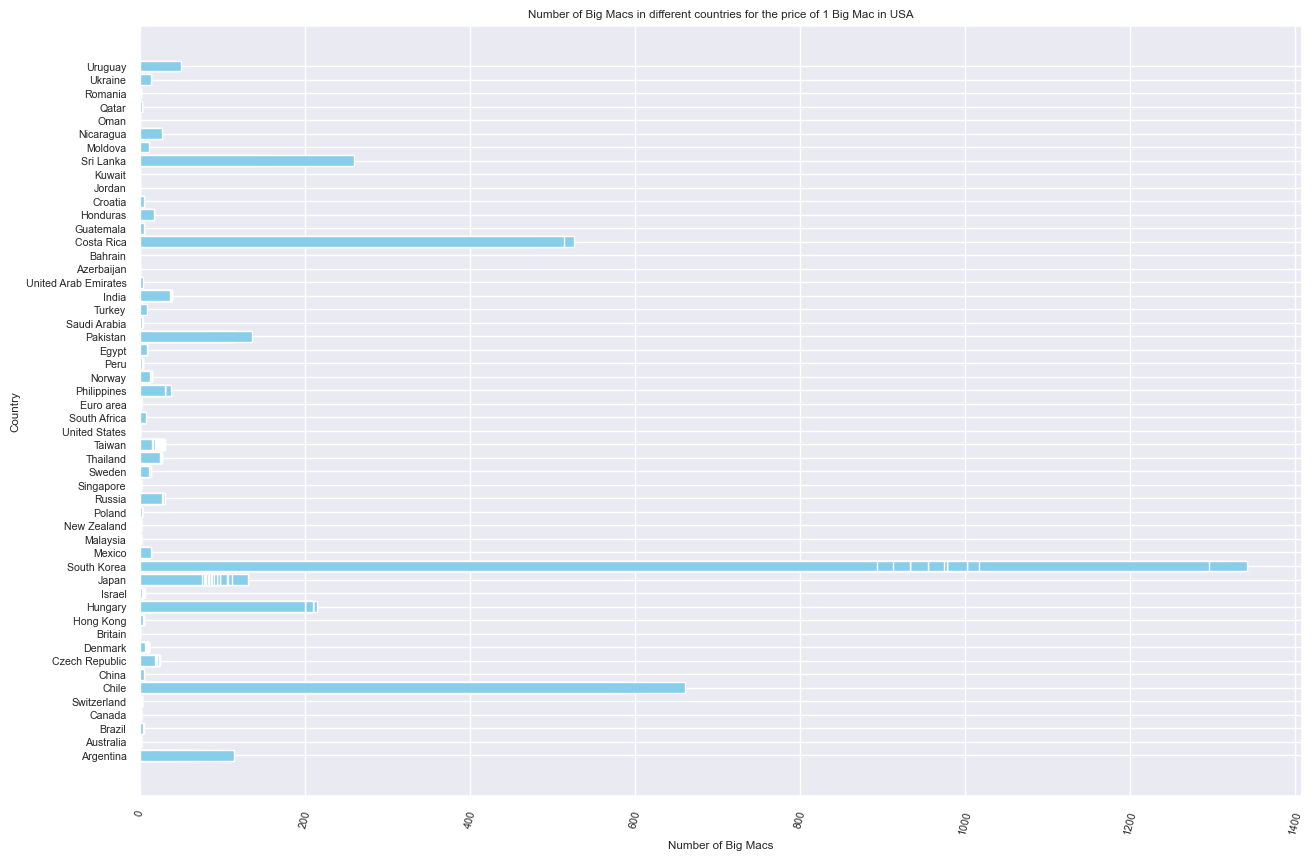

In [291]:
#making bar chart to see mean statistic based on new colomn "number_of_bigmacs" and download it
plt.figure(figsize=(15, 10))
plt.barh(df_macnew['name'], df_macnew['number_of_bigmacs'], color='skyblue')
plt.xlabel('Number of Big Macs')
plt.ylabel('Country')
plt.title('Number of Big Macs in different countries for the price of 1 Big Mac in USA')
plt.xticks(rotation=75)
plt.savefig("numbigmac.png")
plt.show()

In [292]:
#info about transformed data
df_macnew.info()
buffer = io.StringIO()
df_macnew.info(buf=buffer)
s = buffer.getvalue()
lines = [line.split() for line in s.splitlines()[3:-2]]
info_df = pd.DataFrame(lines)
dfi.export(info_df, "newinfo.png")

<class 'pandas.core.frame.DataFrame'>
Index: 1310 entries, 0 to 1630
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1310 non-null   datetime64[ns]
 1   iso_a3             1310 non-null   object        
 2   currency_code      1310 non-null   string        
 3   name               1310 non-null   string        
 4   local_price        1310 non-null   float64       
 5   dollar_ex          1310 non-null   float64       
 6   dollar_price       1310 non-null   float64       
 7   usd_raw_%          1310 non-null   float64       
 8   gdp_dollar         1310 non-null   float64       
 9   adj_price          1310 non-null   float64       
 10  usd_adjusted_%     1310 non-null   float64       
 11  number_of_bigmacs  1310 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1), string(2)
memory usage: 133.0+ KB


### 3. Making overall analyses
In this step we wiil display different types of graphics, which will show dependence of our values.

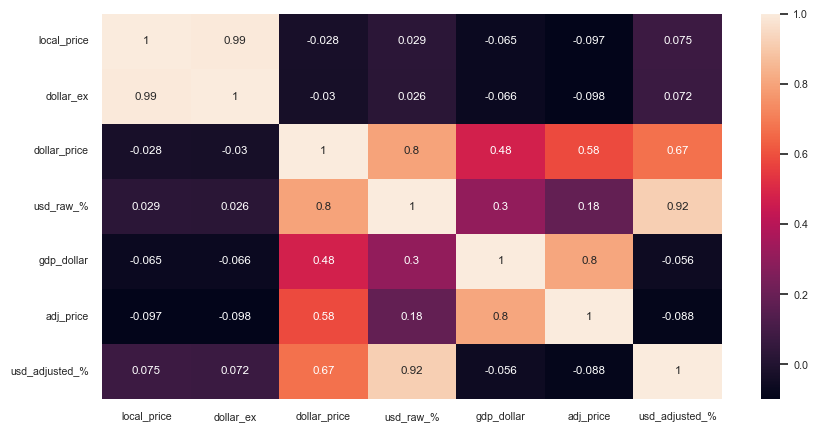

In [293]:
#making correlation heatmap to look for obvious patterns in the data and download it
#note positive correlation between GDP and dollar price. 
plt.figure(figsize=(10,5))
sns.set(font_scale = 0.7)
sns.heatmap(df_mac.corr(numeric_only=True), annot = True)
plt.savefig("heatmap.png")
plt.show()

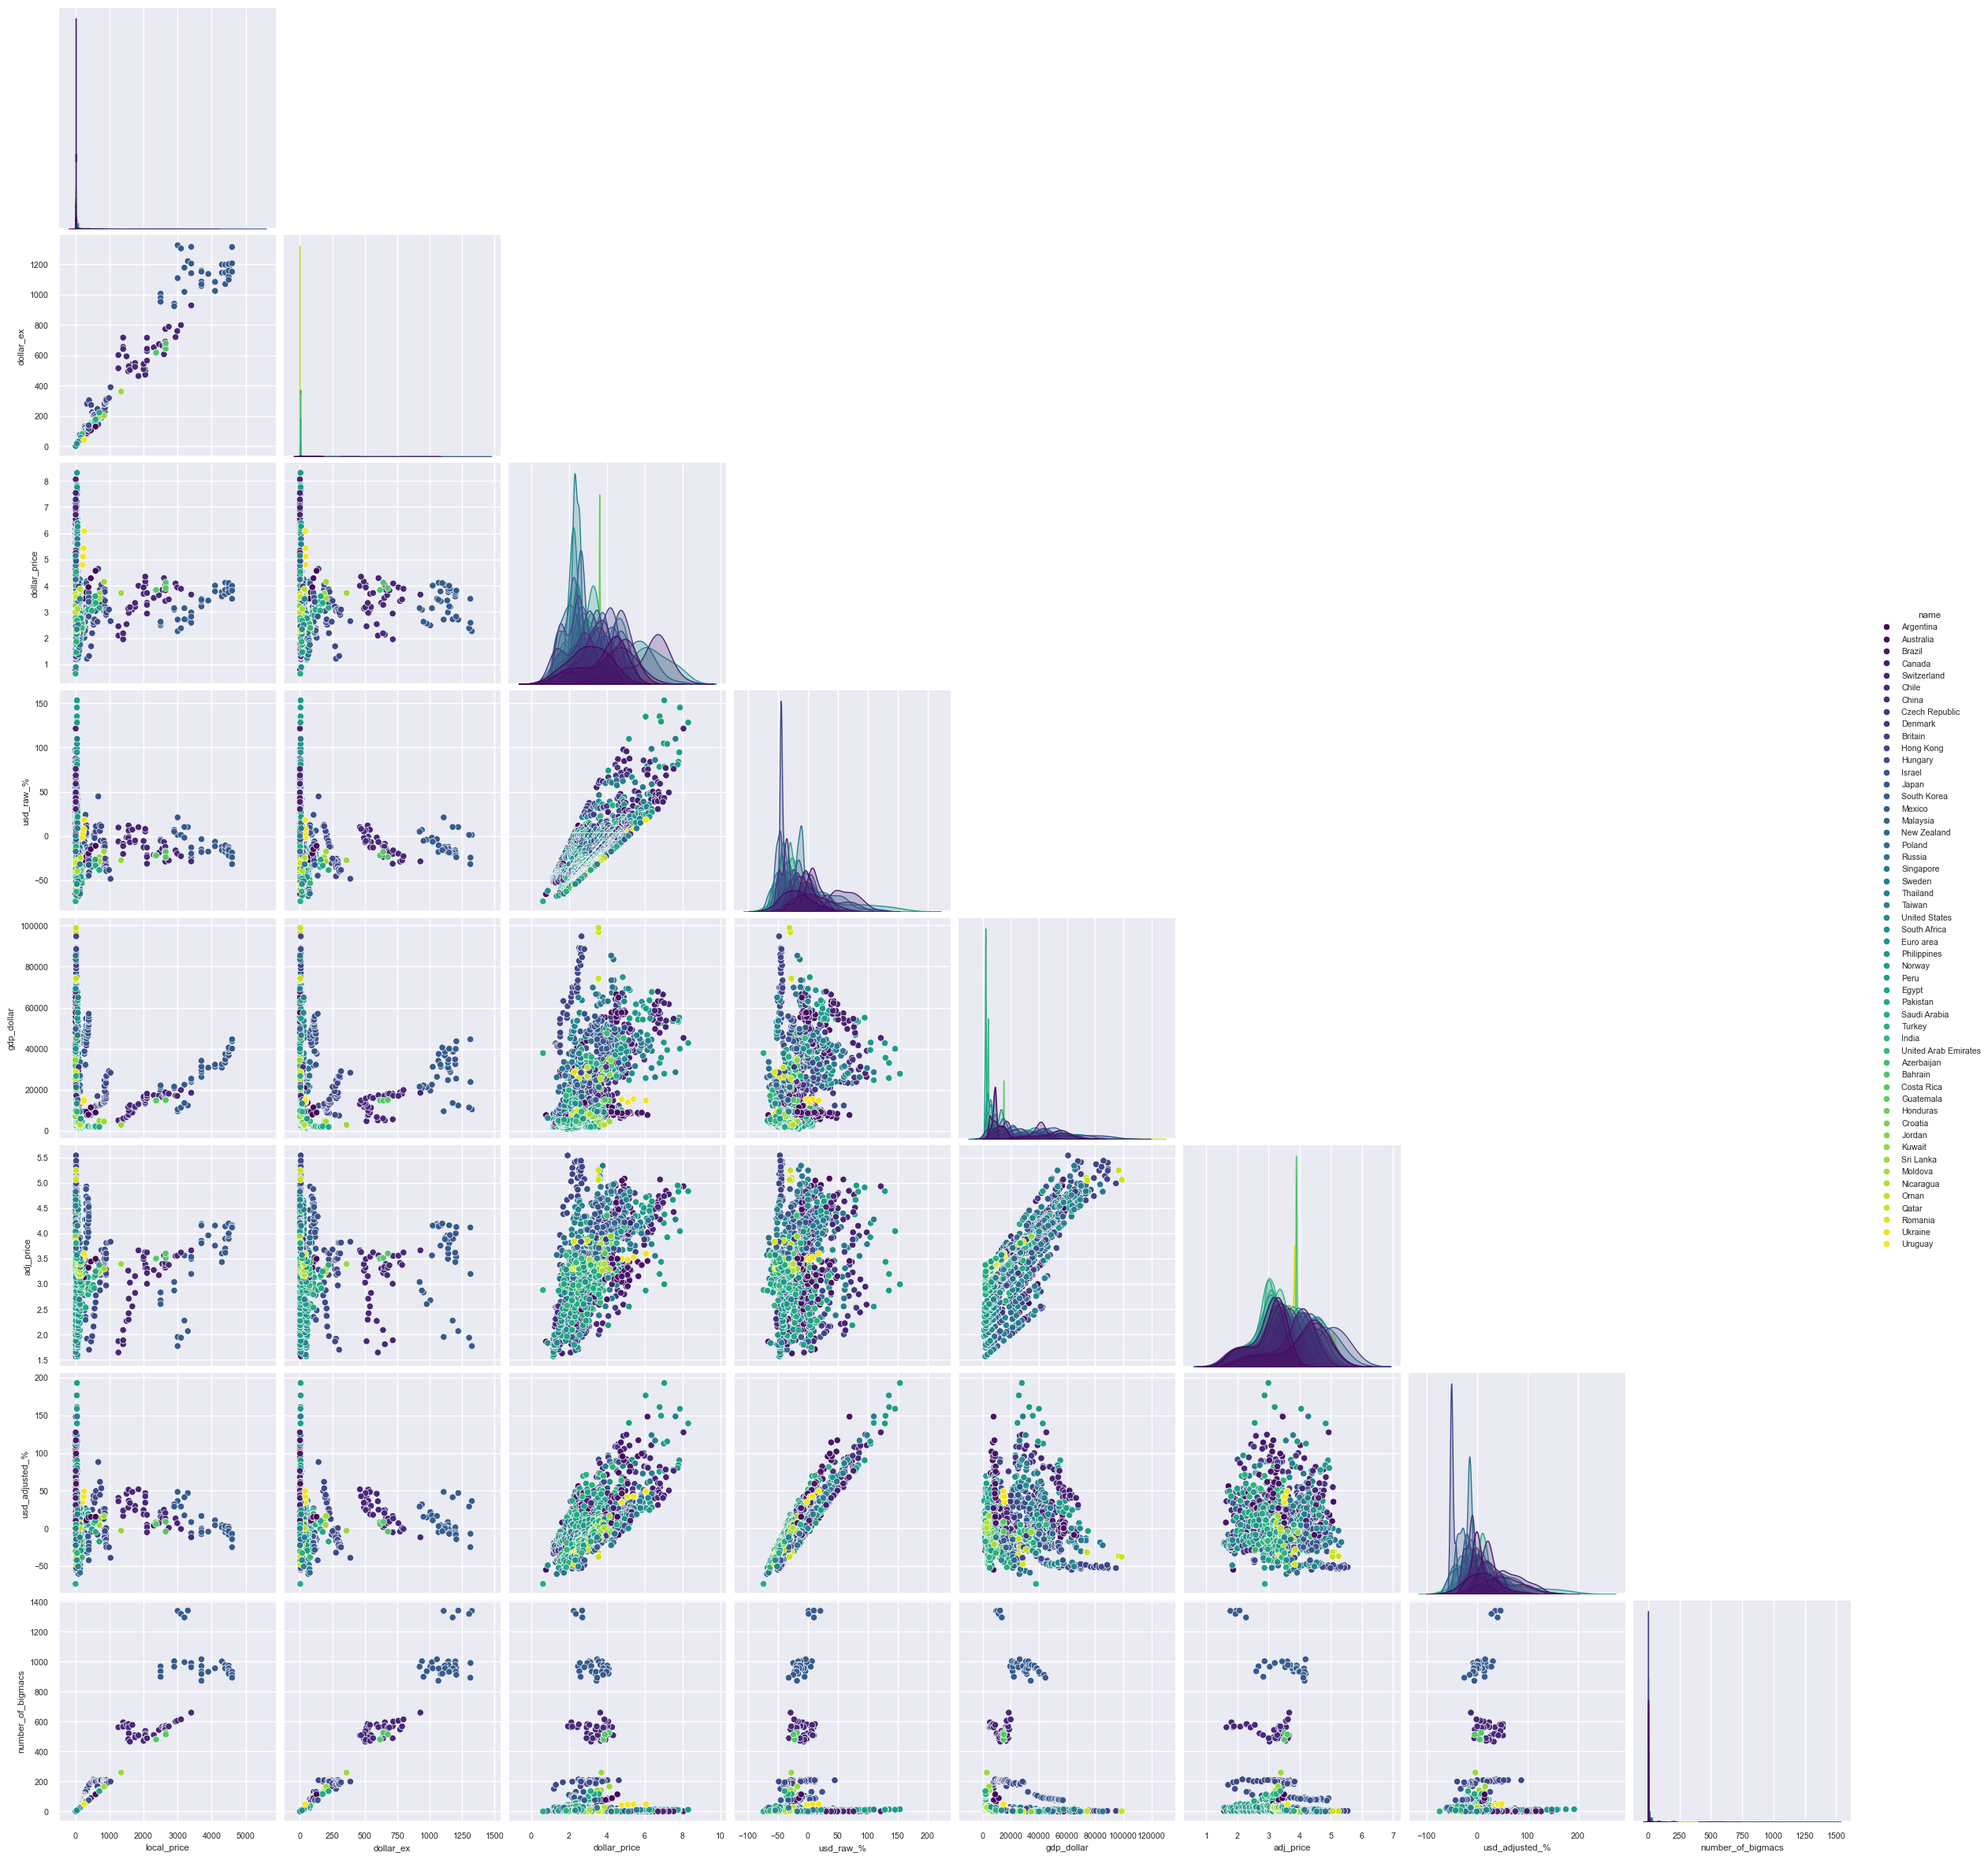

In [269]:
#making pairplot graphic to see the relationship between all pairs of variables and download it
pairplot_kde = sns.pairplot(df_macnew,diag_kind="kde", hue='name', corner=True, palette='viridis', height = 3)
plt.savefig("pairplot.png")
plt.show()

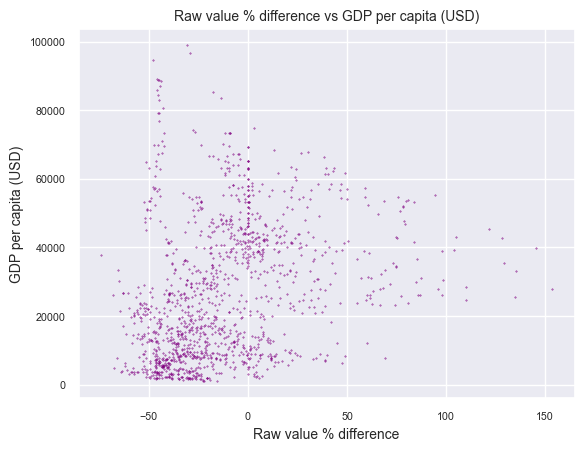

In [270]:
#making graphic which illustrate the correspondence between Raw Value and Gdp Per Capita and download it
x = df_macnew['usd_raw_%']
y = df_macnew['gdp_dollar']
plt.scatter(x,y, s=0.5, c='purple', marker = '.')
plt.title('Raw value % difference vs GDP per capita (USD)',fontsize = 10)
plt.xlabel('Raw value % difference', fontsize = 10)
plt.ylabel('GDP per capita (USD)', fontsize = 10)
plt.savefig("scatter.png")
plt.show()

### 4. Comparison
In this step will consider some specific comparisons of values.

In [271]:
#making world graphic to see number of USD Raw in different countries from 2000 to 2022
fig = px.choropleth(df_mac, locations='iso_a3', color='usd_raw_%', hover_name='name',projection='natural earth', animation_frame='date',title='Usd Raw by Country', width=800)
fig.show()

In [273]:
most_recent = df_mac.loc[df_mac['date'] == '2022-07-01']
comparison = df_mac.loc[df_mac['date'] == '2021-07-01']

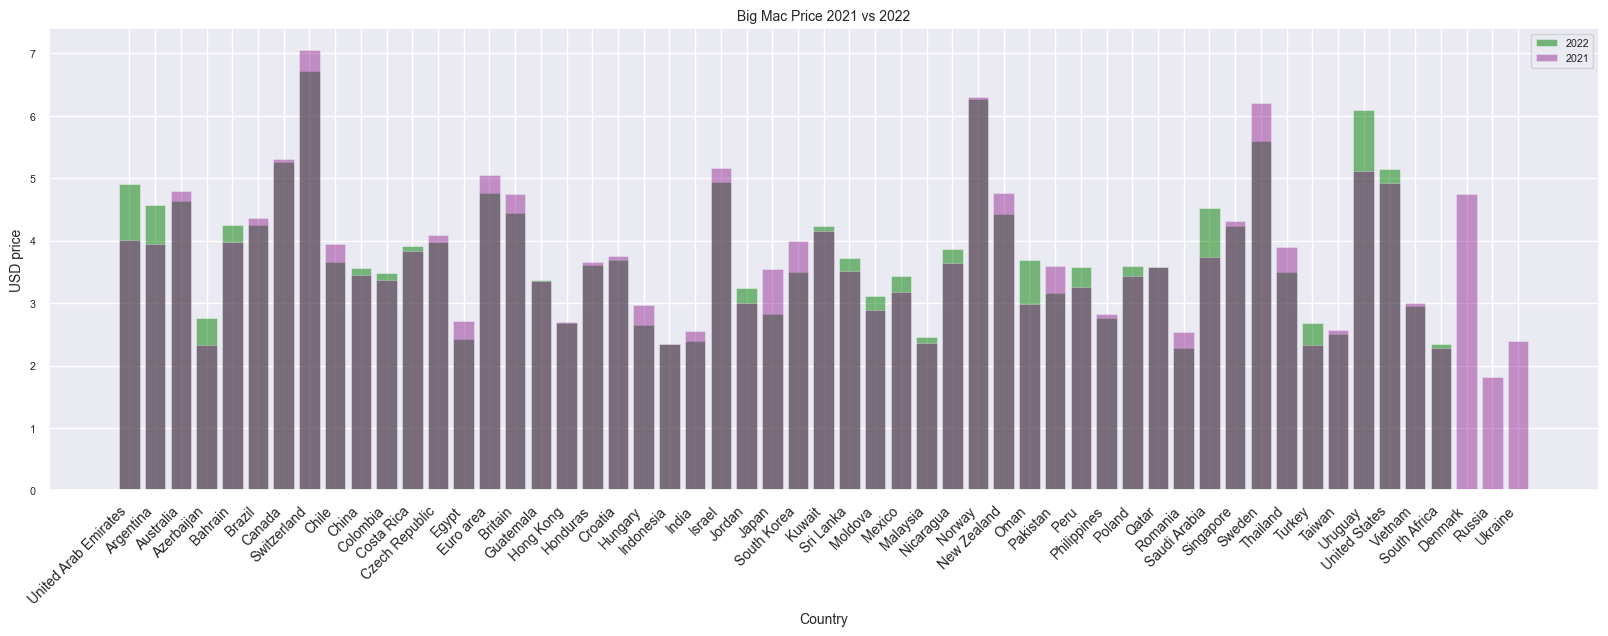

In [274]:
#making hystogram graphic to see difference between Big Mac price in 2021 and 2022 and download it
plt.figure(figsize=(20,6))
plt.bar(most_recent['name'], most_recent['dollar_price'], linewidth = 0.5, color='green', alpha=0.5, label = '2022')
plt.bar(comparison['name'], comparison['dollar_price'], linewidth = 0.5, color='purple', alpha=0.4, label = '2021')
plt.xticks(rotation=45, ha='right', fontsize = 10)
plt.title('Big Mac Price 2021 vs 2022', fontsize =10)
plt.xlabel('Country', fontsize = 10)
plt.ylabel('USD price', fontsize = 10)
plt.savefig("histprice.png")
plt.legend()
plt.show()

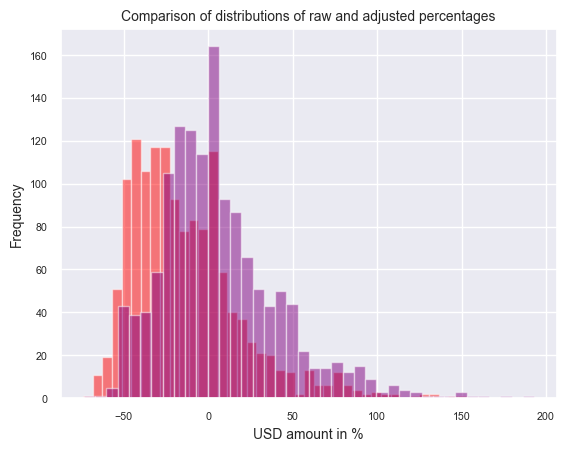

In [275]:
#making hystogram graphic which compare raw and adjusted vlaues and download it
#graphic show number of repetitions of every value
plt.hist(df_mac['usd_raw_%'], bins = 40, color='red', alpha = 0.5)
plt.hist(df_mac['usd_adjusted_%'], bins = 40, color='purple', alpha = 0.5)
plt.title('Comparison of distributions of raw and adjusted percentages', fontsize=10)
plt.xlabel('USD amount in %', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.savefig("histvalue.png")
plt.show()


### 5. Hyposis: "Does the price of a big mac depend on GDP per capita?"
In this step we will test our hypothesis based on the previously analyzed data.

In [276]:
correlation, p_value = pearsonr(df_mac['local_price'], df_mac['gdp_dollar'])

#print the results
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

#check if the null hypothesis can be rejected based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - Price of Big Mac depends on GDP per capita")
else:
    print("Fail to reject the null hypothesis - Price of Big Mac does not depend on GDP per capita")

Correlation coefficient: -0.06544177857750072
p-value: 0.014820023506269807
Reject the null hypothesis - Price of Big Mac depends on GDP per capita


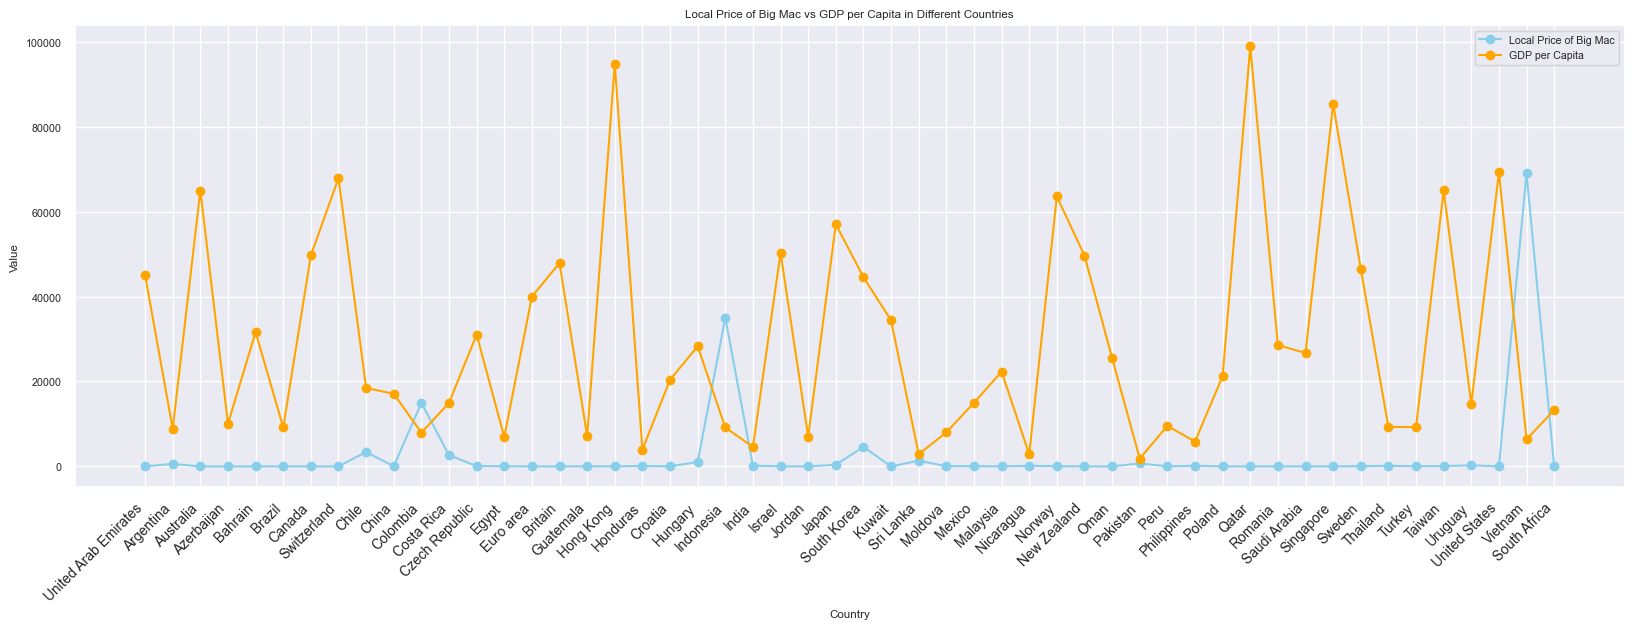

In [277]:
#making line graph to easily analize correlation between GDP per capita and local price of Big Mac and download it
most_recent = df_mac.loc[df_mac['date'] == '2022-07-01']
plt.figure(figsize=(20, 6))
plt.plot(most_recent['name'], most_recent['local_price'], marker='o', linestyle='-', color='skyblue', label='Local Price of Big Mac')
plt.plot(most_recent['name'], most_recent['gdp_dollar'], marker='o', linestyle='-', color='orange', label='GDP per Capita')
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Local Price of Big Mac vs GDP per Capita in Different Countries')
plt.xticks(rotation=45, ha='right', fontsize = 10)
plt.savefig("hypo.png")
plt.legend()
plt.show()
